# DIABETES PREDICTION
### Author- Akshay Bhat
### In this project we will predict if the patient has diabetes or not. <br>
Source : Kaggle Data set <br>
Link- https://www.kaggle.com/uciml/pima-indians-diabetes-database <br>

Libraries used: pandas,numpy,matplotlib,seaborn,sklearn,warnings,missingno<br>
<br>
Project Work Flow:
* We will be using pandas to read the data and analyze it through visualization.
* Next,cleaning of data is done handling the zero values.
* Model selection and building
* Model Evaluation
* Model Prediction

In [1]:
#Importing dependencies

#importing dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
data=pd.read_csv('kaggle_diabetes.csv')

# PART 1- ANALYZING THE DATA

In [3]:
#Length of the data(Returns number of rows)

print(len(data))

2000


In [4]:
#Shape of the data(Returns number of rows and columns)

print(data.shape)

(2000, 9)


In [5]:
#List the columns(Returns an object with all the column headers)

print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
#Check the datatypes(Returns different datatypes associated with each column)
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Analyzing the first 5 rows of the data set

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


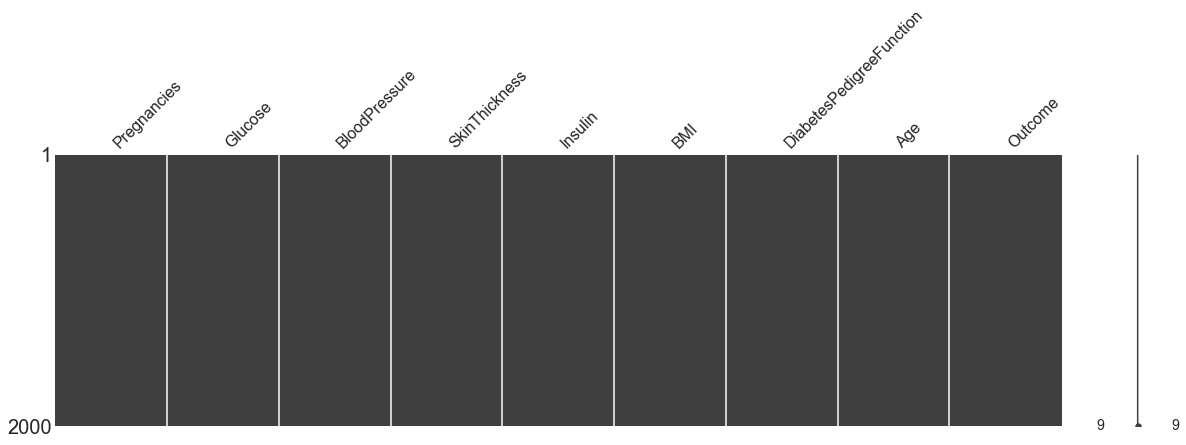

In [9]:
#Check for missing values in the dataset
#Dataset looks clean with no missing values
msno.matrix(data, figsize=(20,5))

#Another method to check missing values is (data.isnull().any())

In [10]:
#Check the statistical information 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


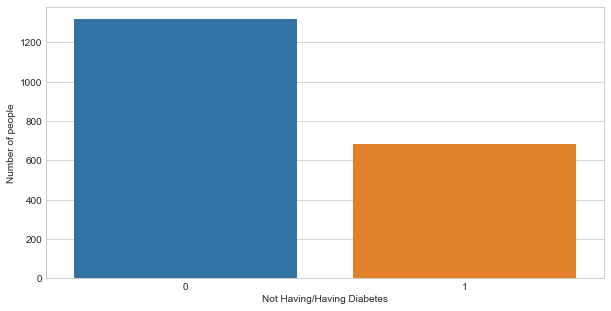

In [11]:
# Analyzing the dataset w.r.t outcomes

plt.figure(figsize=(10,5))
sns.countplot('Outcome', data=data)
plt.xlabel('Not Having/Having Diabetes')# 0-Not having Diabetes,1-Having Diabetes
plt.ylabel('Number of people')

plt.show()



# PART 2- CLEANING THE DATA

In [12]:
#As we dont have any null values in our data, lets check the columns having zero values

data.astype(bool).sum(axis=0)

#We see that there are many zero values in most of the columns.

Pregnancies                 1699
Glucose                     1987
BloodPressure               1910
SkinThickness               1427
Insulin                     1044
BMI                         1972
DiabetesPedigreeFunction    2000
Age                         2000
Outcome                      684
dtype: int64

In [13]:
#As we are interested in only Glucose,BloodPressure,SkinThickness,InsuliN and BMI lets replace the zero values in them to nullvalues(NaN).

data1=data.copy(deep='True')
data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
#Count the null values in the above mentioned columns

data1.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

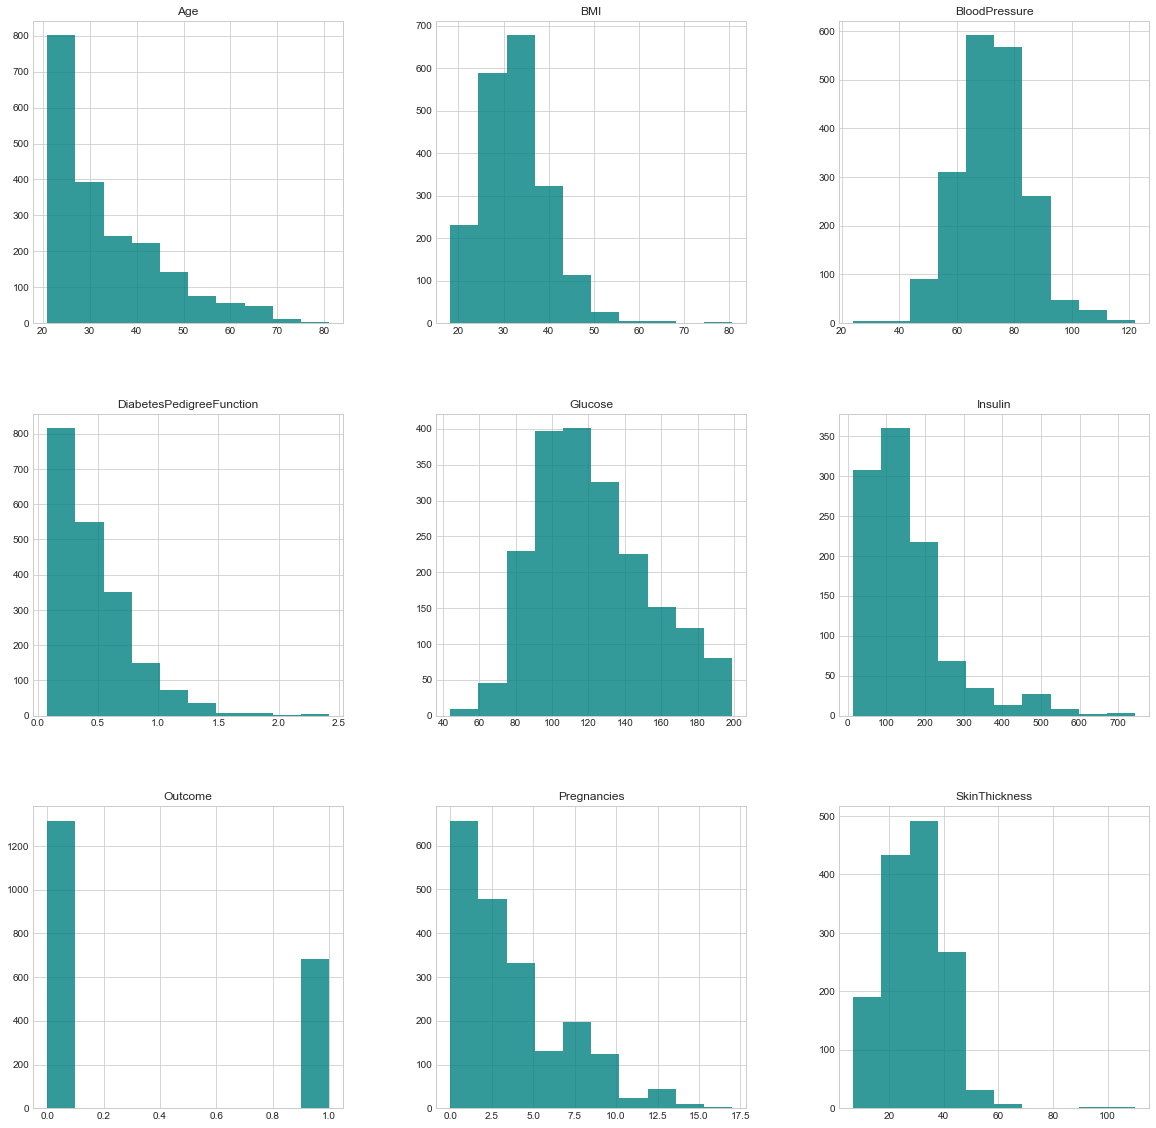

In [15]:
#Before filling in the NaN values let's understand our data.

data1.hist(figsize=(20,20),color='teal',alpha=0.8)
plt.show()

In [16]:
# The approach to fill the NaN values would be: If an attribute has more outliers we fill it with the median value,and if the attribute has evenly spread data we fill it by mean value.
data1['Glucose'].fillna(data1['Glucose'].mean(), inplace=True)
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(), inplace=True)
data1['SkinThickness'].fillna(data1['SkinThickness'].median(), inplace=True)
data1['Insulin'].fillna(data1['Insulin'].median(), inplace=True)
data1['BMI'].fillna(data1['BMI'].median(), inplace=True)


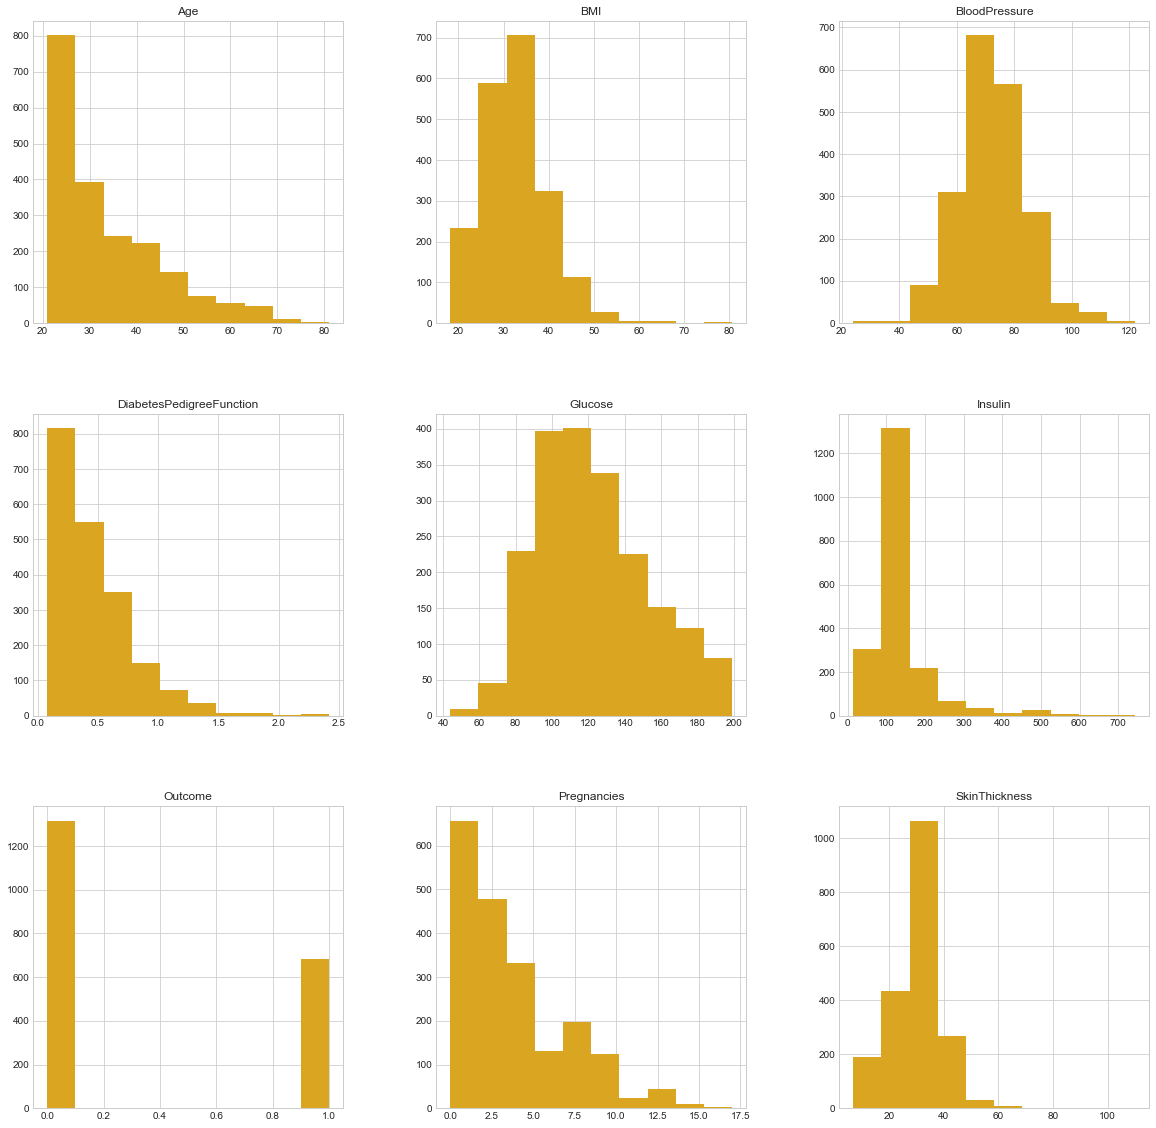

In [17]:
# Visualizing the attributes after filling the NaN values

data1.hist(figsize=(20,20),color='goldenrod')
plt.show()

In [18]:
#Confirm for Null Values
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# PART 3- MODEL SELECTION AND BUILDING

In [19]:
#Preparing the training set 
#The first 8 columns are our features and the last column is the class which is to be predicted.

F=data1.iloc[:,:8]
F


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26


In [20]:
C=data1.iloc[:,-1]
C

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

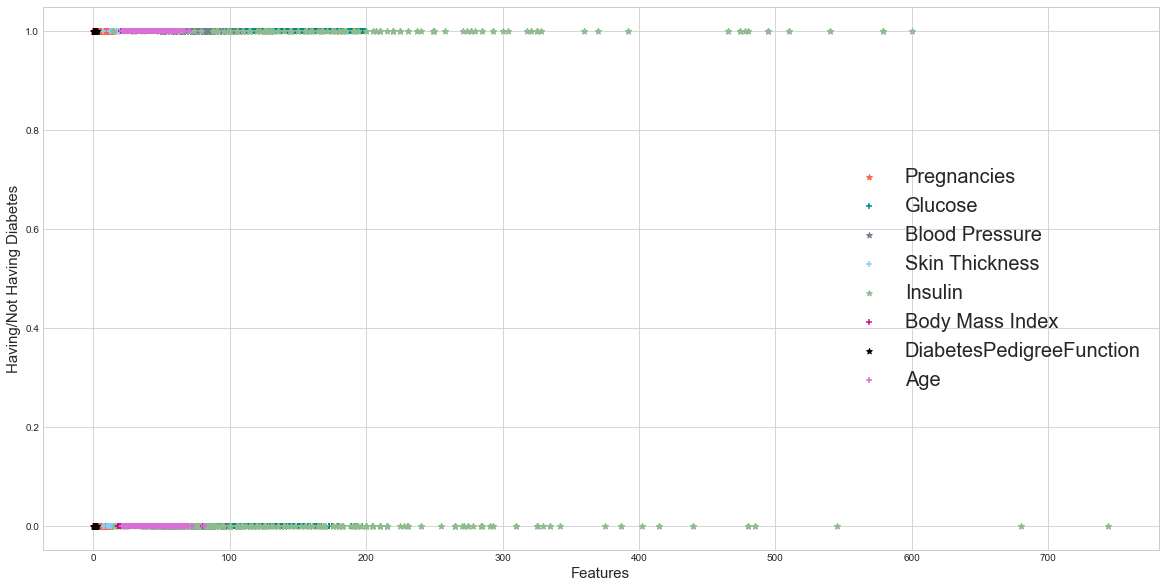

In [21]:
#Plotting the relation of each feature with the class(Having or Not Having Diabetes).

plt.figure(figsize=(20,10))
plt.xlabel('Features',size=15)
plt.ylabel('Having/Not Having Diabetes',size=15)


pltX =F.loc[:,'Pregnancies']
pltY=C
plt.scatter(pltX,pltY,color='tomato',marker='*',label='Pregnancies')

pltX =F.loc[:,'Glucose']
pltY=C
plt.scatter(pltX,pltY,color='darkcyan',marker='+',label='Glucose')

pltX =F.loc[:,'BloodPressure']
pltY=C
plt.scatter(pltX,pltY,color='slategrey',marker='*',label='Blood Pressure')

pltX =F.loc[:,'SkinThickness']
pltY=C
plt.scatter(pltX,pltY,color='lightskyblue',marker='+',label='Skin Thickness')

pltX =F.loc[:,'Insulin']
pltY=C
plt.scatter(pltX,pltY,color='darkseagreen',marker='*',label='Insulin')

pltX =F.loc[:,'BMI']
pltY=C
plt.scatter(pltX,pltY,color='mediumvioletred',marker='+',label='Body Mass Index')

pltX =F.loc[:,'DiabetesPedigreeFunction']
pltY=C
plt.scatter(pltX,pltY,color='black',marker='*',label='DiabetesPedigreeFunction')

pltX =F.loc[:,'Age']
pltY=C
plt.scatter(pltX,pltY,color='orchid',marker='+',label='Age')


plt.legend(loc='center right',fontsize=20)
plt.show()

In [22]:
#Splitting our data into 80% Training and 20% Testing Data using the train_test_split.

x_train,x_test,y_train,y_test=train_test_split(F,C,test_size=0.2,random_state=0)
print('x_train size: {}, x_test size: {}'.format(x_train.shape, x_test.shape))

x_train size: (1600, 8), x_test size: (400, 8)


In [23]:
#Feature scaling
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
# Selecting the best model using GridSearchCV 
# Here the estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Creating a function to select the best model.
def best_model(F, C):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(F, C)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.893750
2,random_forest,{'n_estimators': 200},0.953125
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.864375


In [25]:
#RandomForest Classifier stands out with an accuracy of 94.8%.
# Further let's fine tune the model using hyperparameter optimization.

# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), x_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95.0%


In [26]:
# Creating Random Forest model

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# PART 4 - MODEL EVALUATION

In [27]:
# Creating a confusion matrix for test set
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[269,   3],
       [  1, 127]], dtype=int64)

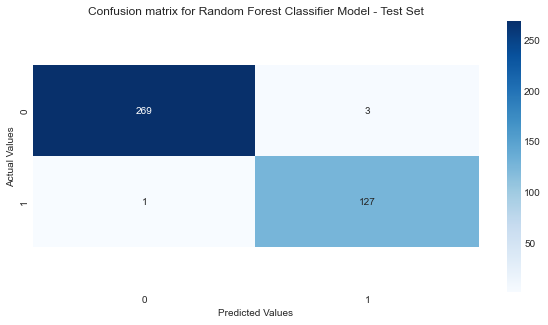

In [28]:
# Plotting the confusion matrix for testing set
plt.figure(figsize=(10,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

#Avoiding the bug that cuts the top and bottom of the plot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [29]:
# Check the Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 99.0%


In [30]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [31]:
# Creating the confusion matrix for training set
y_train_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1043,    1],
       [   1,  555]], dtype=int64)

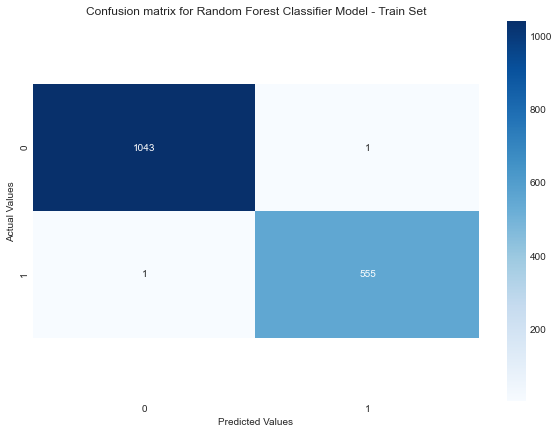

In [32]:
#Plotting the confusion matrix for training set
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


#Avoiding the bug that cuts the top and bottom of the plot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [33]:
# Check the Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.88%


In [34]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# PART 5 - MODEL PREDICTION

In [35]:
# Creating a function for the model to predict
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [42]:
# Example-Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(3, 75, 80, 15, 110, 30.1, 0.547, 28)[0]
if prediction:
  print('Sorry! You have diabetes.')
else:
  print("Congrats! You don't have diabetes.")

Congrats! You don't have diabetes.


In [41]:
# Example-Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(0, 100, 85, 88, 130, 36.0, 0.547, 35)[0]
if prediction:
  print('Sorry! You have diabetes.')
else:
  print("Congrats! You don't have diabetes.")

Congrats! You don't have diabetes.
